In [1]:
import configparser
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sys
sys.path.append('..')

from data.data_util import cluster_data

config = configparser.ConfigParser()
config.read("../config.ini")

['../config.ini']

In [2]:
dataset = 'nih'
id = "4c26f705-c835-438c-9dc5-e66dbb27ad00"

# Load data
data = pd.read_csv(f"{config[dataset]['labels']}")
data = cluster_data(data, id, dataset_name=dataset, pca=np.load(f"../data/dataset/experiment/{id}/tsne_{dataset}_{id}.npy"), tsne=np.load(f"../data/dataset/experiment/{id}/pca_{dataset}_{id}.npy"), cluster_type='spectral')

/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarni

(0.0, 100.0)

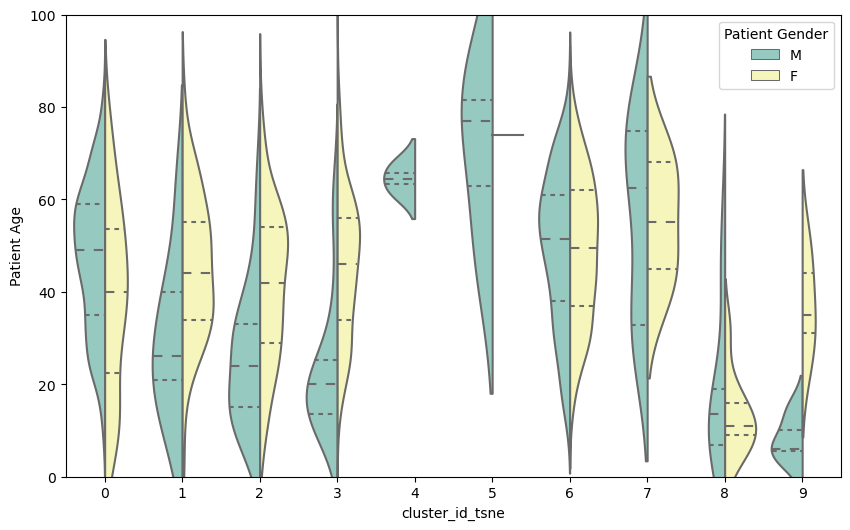

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="cluster_id_tsne", y="Patient Age", data=data, palette="Set3", split=True, inner="quart", fill=False, hue="Patient Gender")               
plt.ylim(0, 100)

<Axes: xlabel='cluster_id_tsne'>

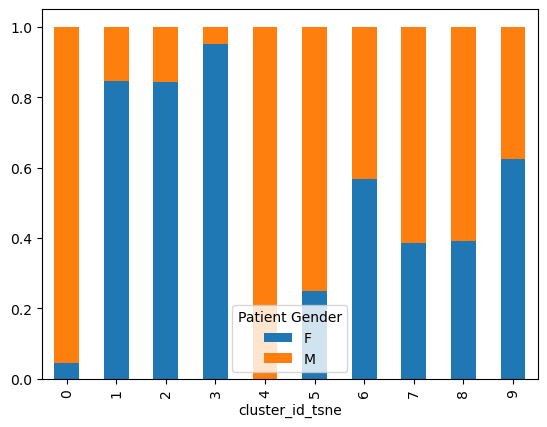

In [4]:
grouped = data.groupby(['cluster_id_tsne', 'Patient Gender']).size().unstack().fillna(0)
grouped_percentage = grouped.divide(grouped.sum(axis=1), axis=0)

# Criando um gráfico de barras empilhado
grouped_percentage.plot(kind='bar', stacked=True)

In [5]:
grouped_percentage

Patient Gender,F,M
cluster_id_tsne,,
0,0.043925,0.956075
1,0.844828,0.155172
2,0.843260,0.156740
3,0.950096,0.049904
4,0.000000,1.000000
5,0.250000,0.750000
6,0.566667,0.433333
7,0.384615,0.615385
8,0.391304,0.608696


In [6]:
data.groupby('cluster_id_tsne').size()

cluster_id_tsne
0    1070
1      58
2     319
3     521
4       2
5       4
6     480
7      13
8      23
9       8
dtype: int64